In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/action_detection/model')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from lstm_model import LSTMModel
from data_loader import get_data

In [3]:
X_train, X_test, y_train, y_test = get_data()

data.csv already generated, skip!
data.csv already generated, skip!
data.csv already generated, skip!
data.csv already generated, skip!
data.csv already generated, skip!


In [4]:
X_train.shape

(17557, 10, 126)

In [5]:
ae_lstm = LSTMModel(X_train, X_test, y_train, y_test)
ae_lstm.initialize_model()

In [6]:
ae_lstm.model.summary()

Model: "LSTMModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 0_LSTM (LSTM)               (None, 10, 128)           130560    
                                                                 
 1_Dropout (Dropout)         (None, 10, 128)           0         
                                                                 
 7_Flatten (Flatten)         (None, 1280)              0         
                                                                 
 8_Dense (Dense)             (None, 128)               163968    
                                                                 
 9_Dense (Dense)             (None, 12)                1548      
                                                                 
Total params: 296,076
Trainable params: 296,076
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = ae_lstm.model_fit()

In [8]:
res = ae_lstm.evaluate()
print(f"accuracy: {res}")

236/236 [==============================] - 1s 3ms/step - loss: 0.1071 - accuracy: 0.9652
accuracy: 0.9651827216148376


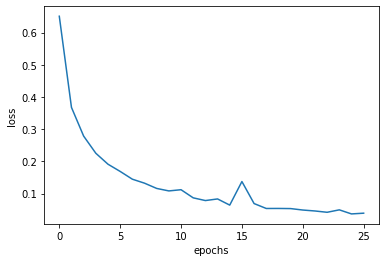

In [9]:
ae_lstm.show_loss()

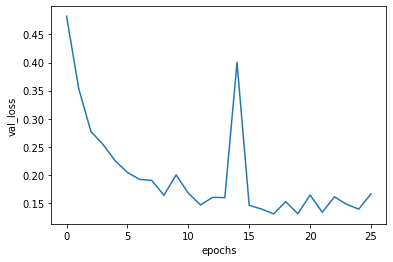

In [10]:
ae_lstm.show_val_loss()

In [11]:
ae_lstm.save()

INFO:tensorflow:Assets written to: ram://a10ff102-8fb5-4310-a914-e3e335e98af0/assets


INFO:tensorflow:Assets written to: ram://a10ff102-8fb5-4310-a914-e3e335e98af0/assets


In [12]:
import numpy as np
y_pred = ae_lstm.predict()
pred = np.array(np.argmax(y_pred,axis=1)).reshape(-1)
y_test = np.argmax(y_test, axis=1).reshape(-1)

In [13]:
print(np.argmax(y_train, axis=1).reshape(-1))
# print(y_pred.shape)
# print(y_test.shape)

[11 11  5 ... 11 11 11]


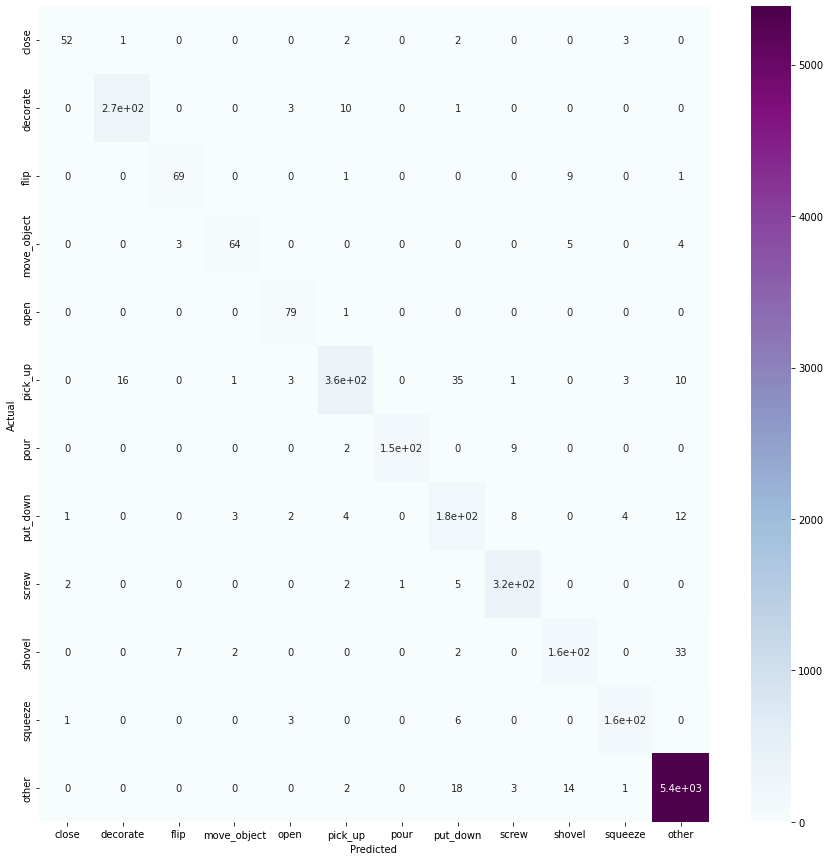

In [14]:
ae_lstm.plot_confusion_matrix(y_test, pred)

In [15]:
from sklearn.metrics import classification_report
labels_str = ["close","decorate","flip","move_object","open","pick_up","pour","put_down","screw","shovel","squeeze", "other"]
labels_num = [0,1,2,3,4,5,6,7,8,9,10,11]
print(classification_report(y_test, pred, labels=labels_num, target_names=labels_str))
# print(y_test.shape)
# print(pred.shape)

              precision    recall  f1-score   support

       close       0.93      0.87      0.90        60
    decorate       0.94      0.95      0.95       288
        flip       0.87      0.86      0.87        80
 move_object       0.91      0.84      0.88        76
        open       0.88      0.99      0.93        80
     pick_up       0.94      0.84      0.89       431
        pour       0.99      0.93      0.96       165
    put_down       0.72      0.84      0.77       209
       screw       0.94      0.97      0.95       333
      shovel       0.85      0.79      0.82       209
     squeeze       0.94      0.94      0.94       171
       other       0.99      0.99      0.99      5423

    accuracy                           0.97      7525
   macro avg       0.91      0.90      0.90      7525
weighted avg       0.97      0.97      0.97      7525



In [20]:
import pickle
model = pickle.load(open("finalized_model_5_bags_1_20.sav", "rb"))
model.summary()

Model: "LSTMModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 0_LSTM (LSTM)               (None, 20, 128)           130560    
                                                                 
 1_Dropout (Dropout)         (None, 20, 128)           0         
                                                                 
 2_LSTM (LSTM)               (None, 20, 64)            49408     
                                                                 
 7_Flatten (Flatten)         (None, 1280)              0         
                                                                 
 8_Dense (Dense)             (None, 128)               163968    
                                                                 
 9_Dense (Dense)             (None, 12)                1548      
                                                                 
Total params: 345,484
Trainable params: 345,484
Non-train